# Lab Assignment 2

**Computer Vision** - Term 5, 2023

Instructor: Dr. Saumya Jetley <br>
TA: Ribhu Lahiri, Raghav Awasty

For reference: 
* Define a filter (matrix of values) that can be convolved with the input image to extract different kinds of frequency information from the image.
* Implement the Sobel, Canny and Laplace edge detectors.
* Modify the filter values to create new filters and observe the output when convolved with the input image.


In [2]:
# Imports 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Rewriting the sample code to download and view the images. 

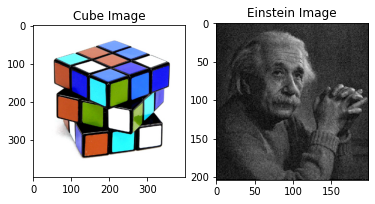

In [5]:
import gdown
import cv2
import matplotlib.pyplot as plt

# Downloading images
id1 = "1oIK5OKyx-J82R0LR2g3-8w7YAUB-L6ra"
gdown.download(id=id1, output='cube.jpeg', quiet=True)

id2 = "1oO2uY_bZhD9O9F45F8jZ0HBYmv9vIUo9"
gdown.download(id=id2, output='einstein.jpeg', quiet=True)

# Reading images
cube = cv2.imread("./cube.jpeg")
einstein = cv2.imread("./einstein.jpeg")

# Displaying images
plt.subplot(1, 2, 1)
plt.imshow(cube)
plt.title("Cube Image")

plt.subplot(1, 2, 2)
plt.imshow(einstein)
plt.title("Einstein Image")

plt.show()


We will work on the Einstein image. 

In [20]:
im=cv2.imread("./einstein.jpeg",0)

**Implement the convolve function** *(1 point)*

Use the helper method `window` to create a function that uses the sliding window to convolve over a given image.

In [21]:
# Task: 

def window(receptive_field, filter):
    ''' 
    Convolves a filter over the receptive field from the image

    Parameters
    ----------
    receptive_field: np.ndarray
        The portion of the image the convolution is being done over

    flter: np.ndarray
        The defined filter

    Returns
    -------
    np.ndarray
        The convolved receptive field output
    '''
    # Use the NumPy sum() function to sum the element-wise multiplication of the filter and receptive field
    return np.sum(filter * receptive_field)


def convolve(img, kernel):
    ''' 
    Convolves the kernel over the image (sliding window)

    Parameters
    ----------
    img: np.ndarray
        The image as a 2-dimensional matrix

    kernel: np.ndarray
        The defined kernel

    Returns
    -------
    output_img: np.ndarray
        The image after convolving the kernel over it
    '''
    # Get the height and width of the image and the kernel
    height, width = img.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the output height and width based on the dimensions of the image and kernel
    out_height = int((height - kernel_height) + 1)
    out_width = int((width - kernel_width) + 1)

    # Create an output matrix with dimensions equal to the output height and width, initialized with zeros
    output = np.zeros((out_height, out_width))
    
    # Loop over the output matrix and at each point, extract a receptive field from the image with the same dimensions as the kernel
    for i in range(out_height):
        for j in range(out_width):
            receptive_field = img[i:i+kernel_height, j:j+kernel_width]

            # Convolve the kernel over the receptive field using the window() function defined earlier and store the result in the output matrix
            output[i, j] = window(receptive_field, kernel)

    # Return the output matrix as the convolved image
    return output



Sample sharpen filter to check functionality

In [22]:
image_array = np.asarray(im)

# Sharpen
filter = np.array(([0, -1, 0], 
                   [-1, 7, -1], 
                   [0, -1, 0]))

In [23]:
filtered_im = convolve(image_array, filter)

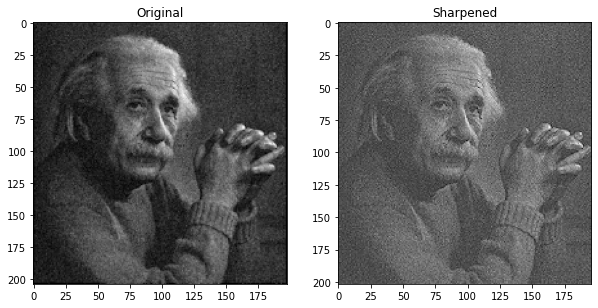

In [24]:
fsize = (10, 6)
plt.figure(figsize = fsize)
plt.subplot(121),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(122),plt.imshow(filtered_im, 'gray'), plt.title('Sharpened')
plt.show()

## Sobel filters to check functionality

- Converting the image into grayscale
- Convolving the gray image with Sobel-x filter
- Convolving the gray image with Sobel-y filter
- Calculating the gradient magnitude and direction

In [25]:
# Sobel filters
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

# gaussian_1d = np.array([1, 2, 1],np.float32)
# x_derivative = np.array([-1, 0, 1],np.float32)
# s_x = np.outer(gaussian_1d, x_derivative)  
# s_y = np.outer(x_derivative, gaussian_1d)

filtered_v = convolve(image_array, sobel_x)
filtered_h = convolve(image_array, sobel_y)

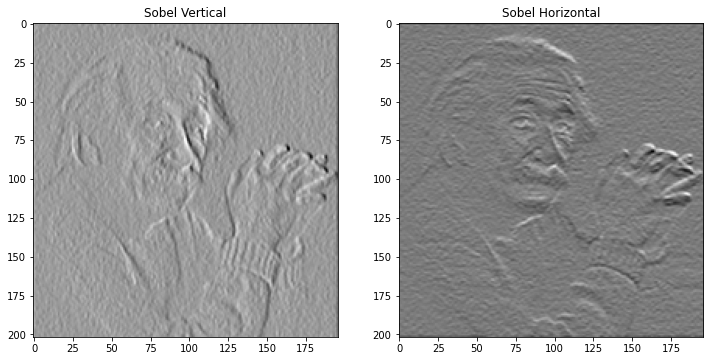

In [26]:
fsize = (12,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(filtered_v, 'gray'), plt.title('Sobel Vertical')
plt.subplot(122), plt.imshow(filtered_h, 'gray'), plt.title('Sobel Horizontal')
plt.show()

In [27]:
# Combining them to get the gradients magnitude (scales intensities b/w 0 and max)
sobel_manual = np.sqrt(filtered_h**2 + filtered_v**2)

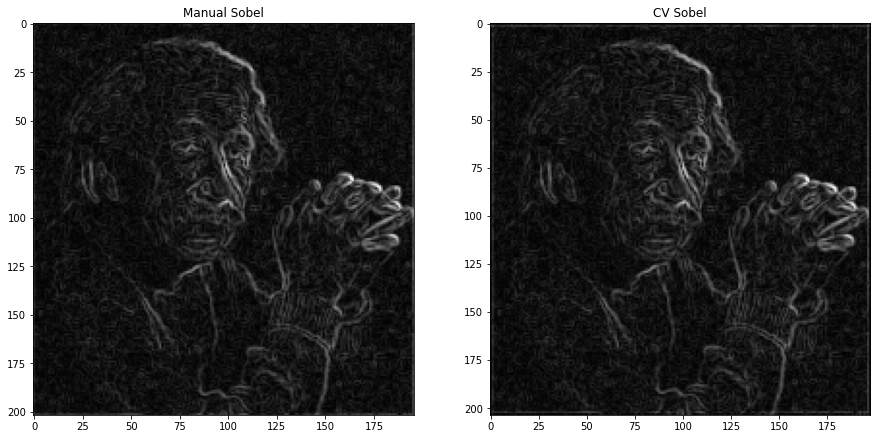

In [28]:
# Using the CV2 module
sobel_x_cv = cv2.Sobel(image_array,cv2.CV_64F, 1, 0, ksize=3)
sobel_y_cv = cv2.Sobel(image_array,cv2.CV_64F, 0, 1, ksize=3)
sobel_cv = np.hypot(np.absolute(sobel_x_cv), np.absolute(sobel_y_cv))

fsize = (15, 8)
plt.figure(figsize=fsize)
plt.subplot(121), plt.imshow(sobel_manual, 'gray'), plt.title('Manual Sobel')
plt.subplot(122), plt.imshow(sobel_cv, 'gray'), plt.title('CV Sobel')
plt.show()

## Canny edge-detection step:

### 1. Apply Gaussian Kernel to **smooth edges**

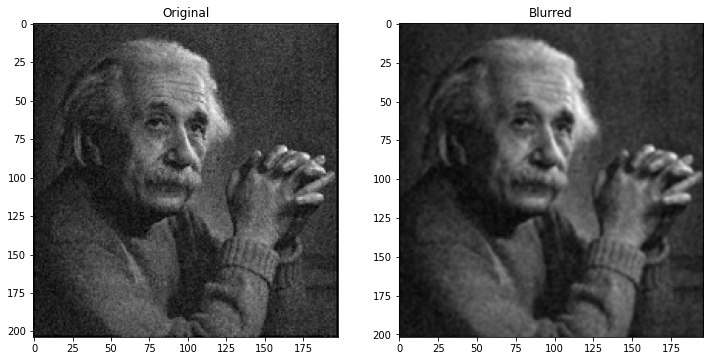

In [29]:
# Applying gaussian blurring
gaussian = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]]) / 16

blurred = convolve(image_array, gaussian)

fsize = (12,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(122), plt.imshow(blurred, 'gray'), plt.title('Blurred')
plt.show()

### 2. Apply Sobel filter to **find gradients**
    
- Gradient Magnitude: 
$$Gm = \sqrt{x^2 + y^2}$$
    
- Gradient Direction
$$Gd = arctan(y/x)$$

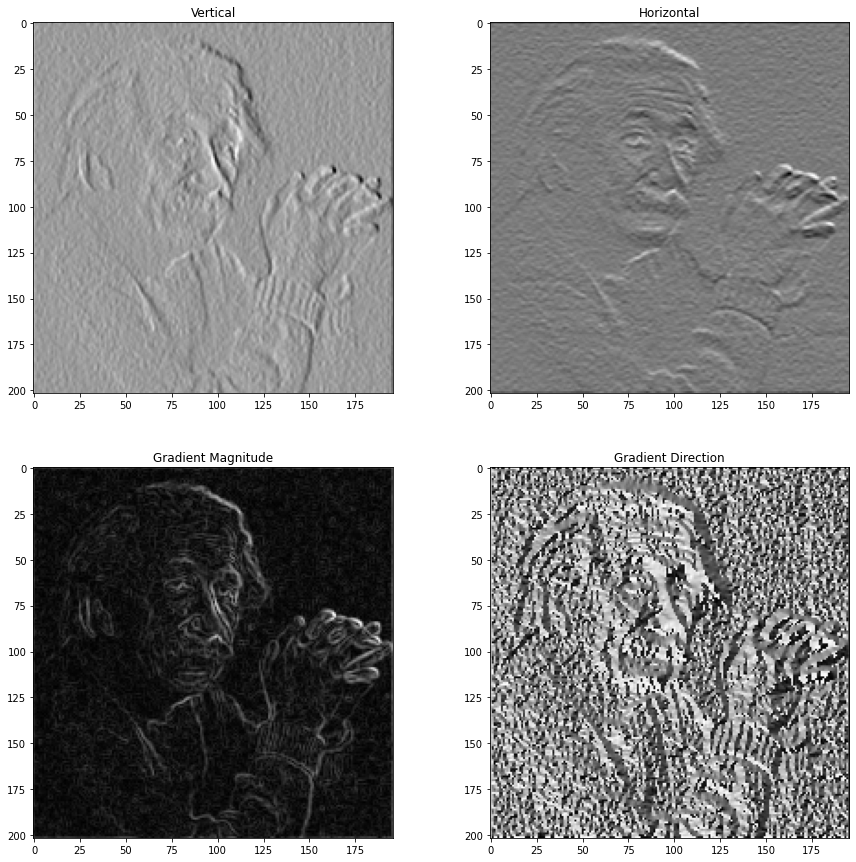

In [30]:
# Applying the sobel filter to detect edges
filtered_v = convolve(im, sobel_x)
filtered_h = convolve(im, sobel_y)

# Finding the gradient magnitude and direction to be passed to NMS
Gm = (filtered_v**2 + filtered_h**2)**0.5
Gd = np.rad2deg(np.arctan2(filtered_v, filtered_h))

fsize = (15, 15)
plt.figure(figsize = fsize)
plt.subplot(221), plt.imshow(filtered_v, 'gray'), plt.title('Vertical')
plt.subplot(222), plt.imshow(filtered_h, 'gray'), plt.title('Horizontal')
plt.subplot(223), plt.imshow(Gm, 'gray'), plt.title('Gradient Magnitude')
plt.subplot(224), plt.imshow(Gd, 'gray'), plt.title('Gradient Direction')
plt.show()

### 3. Non-maximum suppression for **edge thinning (preserves the sharpest gradients and discards the others)** *(1 point)*

- Check every pixel on the Gradient magnitude image and choose 2 neighbor of the pixel according to Gradient Direction. If center pixel is larger than the both neighbors then keep it, otherwise set the pixel to 0

```
for each pixel:
    pick the neighbouring pixels based on gradient direction
    if pixel value > neighbouring pixels:
        pixel value == pixel value
    else:
        pixel value == 0
```

In [31]:
# Applying NMS to make edges consistent
def f_NMS(Gm, Gd):
    ''' 
    Applies non-maximal suppression to the gradient magnitude using the gradient direction

    Parameters
    ----------
    Gm: np.ndarray
        The gradient magnitude

    Gd: np.ndarray
        The gradient directions

    Returns
    -------
    np.ndarray
        The image with suppressed edges
    '''

    # Get the shape of the gradient magnitude
    rows, cols = Gm.shape

    # Create a new array to hold the output image
    output_image = np.zeros((rows, cols))

    # Set the step size for the angle ranges
    step_size = 45

    # Create an array of angle ranges
    angles = np.arange(-step_size, 180 + step_size, step_size)

    # Loop over every pixel in the gradient magnitude
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):

            # Get the gradient direction of the current pixel
            direction = Gd[i, j]

            # Determine which neighboring pixels to compare based on the gradient direction
            if direction >= angles[0] and direction < angles[1]:
                neighbors = [Gm[i, j - 1], Gm[i, j + 1]]
            elif direction >= angles[1] and direction < angles[2]:
                neighbors = [Gm[i - 1, j + 1], Gm[i + 1, j - 1]]
            elif direction >= angles[2] and direction < angles[3]:
                neighbors = [Gm[i - 1, j], Gm[i + 1, j]]
            else:
                neighbors = [Gm[i - 1, j - 1], Gm[i + 1, j + 1]]

            # If the gradient magnitude of the current pixel is greater than or equal to the neighboring pixels,
            # set the output image pixel to the current pixel's gradient magnitude
            if Gm[i, j] >= max(neighbors):
                output_image[i, j] = Gm[i, j]

    # Return the output image
    return output_image


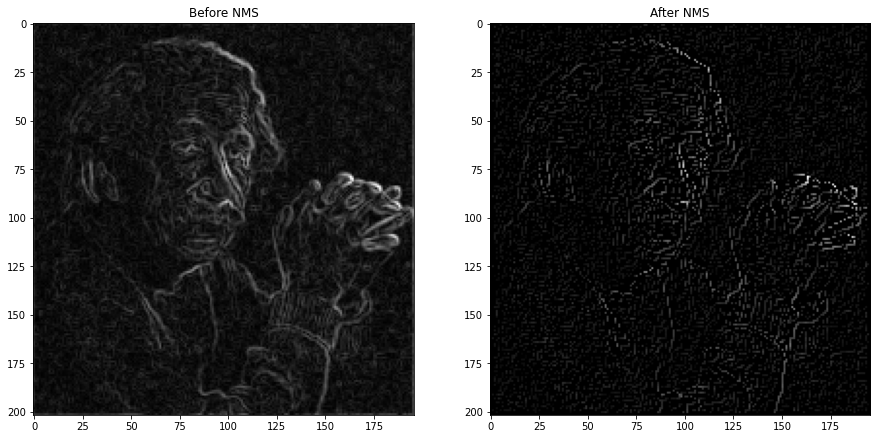

In [32]:
G_NMS = f_NMS(Gm, Gd)
fsize = (15,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(Gm, 'gray'), plt.title('Before NMS')
plt.subplot(122), plt.imshow(G_NMS, 'gray'), plt.title('After NMS')
plt.show()

### 4. Double thresholding to **preserve strong/relevant edges** *(1 point)*

```
For each pixel:
    if pixel value < lower threshold:
        pixel value == 0
    elif pixel value > higher threshold:
        pixel value == strong (255)
    else:
        pixel value == weak
        hysteresis pass
```

In [33]:
# Double threshold to remove weak edges and preserve all other edges
def threshold(img, lowThresholdRatio, highThresholdRatio):
    ''' 
    Filter the strong and relevant edges from the gradient magnitude 
    and removes weak edges based on a high and low threshold value

    Parameters
    ----------
    img: np.ndarray
        The gradient magnitude

    lowThresholdRatio: float
        The fraction of either the max/mean intensity to create the low threshold

    highThresholdRatio: float
        The fraction of either the max/mean intensity to create the high threshold

    Returns
    -------
    res: np.ndarray
        The image with the filtered pixel intensities

    weak: int
        The value set for the weak pixels to be passed to the hysterisis mechanism

    strong: int
        The value set for the strong pixels to be passed to the hysterisis mechanism
    '''

    # Calculate high and low threshold values
    img_max = np.max(img)
    high_thresh = img_max * highThresholdRatio
    low_thresh = high_thresh * lowThresholdRatio
    
    # Get the dimensions of the input image
    num_rows, num_cols = img.shape
    
    # Create an output image array with all zeroes
    res = np.zeros((num_rows, num_cols), dtype=np.int32)
    
    # Define the weak and strong pixel values
    weak_val = np.int32(25)
    strong_val = np.int32(255)
    
    # Find the indices of pixels with strong and weak edges
    strong_row_indices, strong_col_indices = np.where(img >= high_thresh)
    weak_row_indices, weak_col_indices = np.where((img < high_thresh) & (img >= low_thresh))
    
    # Assign the strong and weak pixel values to the corresponding indices in the output image
    res[strong_row_indices, strong_col_indices] = strong_val
    res[weak_row_indices, weak_col_indices] = weak_val
    
    # Return the output image and the weak and strong pixel values
    return res, weak_val, strong_val
    

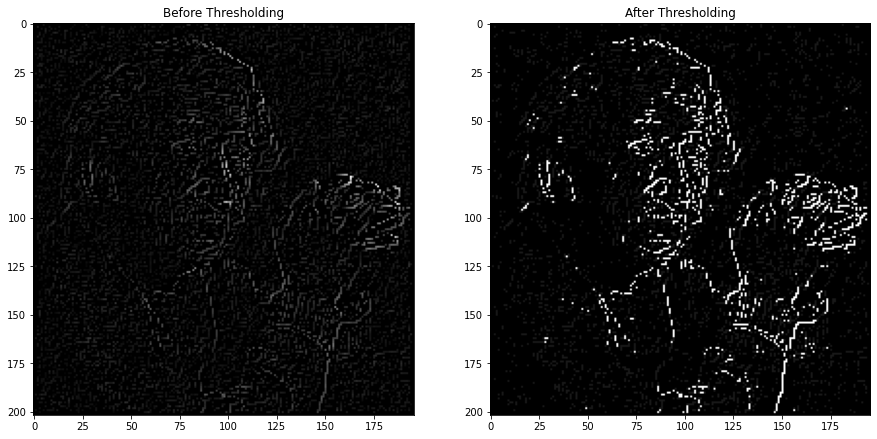

In [34]:
res, weak, strong = threshold(G_NMS, 0.5, 0.2)

fsize = (15,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(G_NMS, 'gray'), plt.title('Before Thresholding')
plt.subplot(122), plt.imshow(res, 'gray'), plt.title('After Thresholding')
plt.show()

### 5. Hysteresis Thresholding to **find the relevant weak edges** *(1 point)*
- Weak edges can be caused by noise or could be relevant,
    - *Connected to strong edges -> true edge*
    - *Not connected to strong edges -> caused by noise*

```
For each pixel:
Compare the magnitude of the pixel being processed with its eight surrounding pixels
    If at least one of these pixels belongs to the strong edges group:
        pixel value == strong (255) 
    else:
        pixel value == 0
```

In [35]:
# Hysterisis pass
def hysteresis(img, weak, strong):
    ''' 
    Filter the strong and relevant edges from the gradient magnitude 
    and removes weak edges based on a high and low threshold value

    Parameters
    ----------
    img: np.ndarray
        The gradient magnitude after double thresholding

    weak: int
        The value of the weak edges

    strong: int
        The value of the strong edges

    Returns
    -------
    np.ndarray
        The final image with only strong edges preserved
    '''

    # Get the dimensions of the image
    num_rows, num_cols = img.shape

    # Iterate over every pixel in the image, except the outermost pixels
    for i in range(1, num_rows - 1):
        for j in range(1, num_cols - 1):

            # Check if the current pixel is a weak edge
            if (img[i, j] == weak):

                # Check if any of the neighboring pixels are strong edges
                if ((img[i+1, j-1] == strong) or 
                    (img[i+1, j] == strong) or 
                    (img[i+1, j+1] == strong) or 
                    (img[i, j-1] == strong) or 
                    (img[i, j+1] == strong) or 
                    (img[i-1, j-1] == strong) or 
                    (img[i-1, j] == strong) or 
                    (img[i-1, j+1] == strong)):

                    # If at least one of the neighboring pixels is a strong edge, set the current pixel to be a strong edge
                    img[i, j] = strong

                # If none of the neighboring pixels are strong edges, set the current pixel to be a non-edge
                else:
                    img[i, j] = 0

    # Return the filtered image
    return img


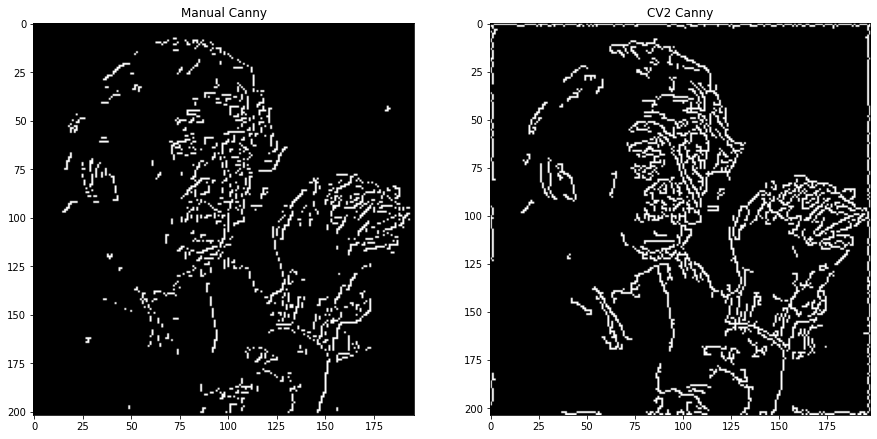

In [36]:
canny_manual = hysteresis(res, weak, strong)

# Using the CV2 module
canny_cv = cv2.Canny(im, 100, 200)

fsize = (15,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(canny_manual, 'gray'), plt.title('Manual Canny')
plt.subplot(122), plt.imshow(canny_cv, 'gray'), plt.title('CV2 Canny')
plt.show()

## Laplacian filter

- Very sensitive to noise; countered by applying gaussian blur/smoothing to reduce the high frequency noise components
- Pair of Laplacian over Gaussian filter (LoG)

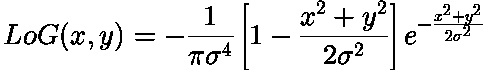

### Creating the **LoG mask** *(1 point)*

In [37]:

def create_LoG(sigma,size):
    '''
    Generates a Laplacian of Gaussian (LoG) filter mask to be convolved over an image.

    Parameters:
    -----------
    sigma : float
        The standard deviation of the Gaussian function.
    size : int
        The size of the filter.

    Returns:
    --------
    LoG : np.ndarray
        The Laplacian of Gaussian filter mask.
    '''
    
    # Generate a meshgrid of x and y values from (-size//2 + 1, size//2 + 1)
    x, y = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1), np.arange(-size//2 + 1, size//2 + 1))
    
    # Calculate the Laplacian of Gaussian filter
    LoG = -(1 / (np.pi * sigma**4)) * (1 - (x**2 + y**2) / (2 * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Subtract the mean of the filter to ensure zero-sum
    LoG = LoG - np.mean(LoG)

    return LoG


In [38]:
# Create the LoG_mask
LoG_mask = create_LoG(1.4, 7)

# convolving with the LoG mask
LoG_image = convolve(image_array, LoG_mask)

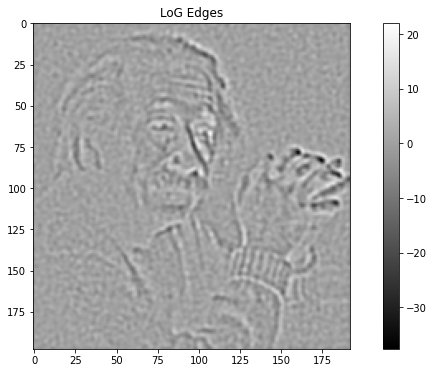

In [39]:
fsize = (12,6)
plt.figure(figsize = fsize)
plt.imshow(LoG_image, 'gray'), plt.title('LoG Edges')
plt.colorbar()
plt.show()

### Estimating edges based on the **zero-crossing** mechanism *(1 point)*

In [40]:


def zero_cross(LoG_image):
    '''
    Finds the inflection point (zero crossing point) by checking the neighborhood
    of each pixel and verifying if the sign changes compared to the pixel being processed

    Parameters
    ----------
    LoG_image: np.ndarray
        The image convolved with the Laplacian of Gaussian (LoG) filter

    Returns
    -------
    np.ndarray
        The image with zero crossing edges
    '''
    
    # Apply a Gaussian blur with a 3x3 kernel and standard deviation of 1 to the input image
    blurred_image = cv2.GaussianBlur(LoG_image, (3, 3), 1)
    
    # Compute the sign of each pixel in the blurred image
    sign = np.sign(blurred_image)

    # Sum the signs of the 8 neighboring pixels for each pixel in the image
    sum_neighbors = np.abs(convolve(sign, np.ones((8,8))))

    # Create a new image with the same dimensions as the input image, initialized to all zeros
    zero_crossing = np.zeros(LoG_image.shape)
    
    # Set the value of each pixel in the zero crossing image to 255 if the sum of its neighbors is less than 4
    zero_crossing[np.where(sum_neighbors < 4)] = 255
  
    # Return the zero crossing image
    return zero_crossing



In [41]:
# Find the zero crossings
laplacian_manual = zero_cross(LoG_image)

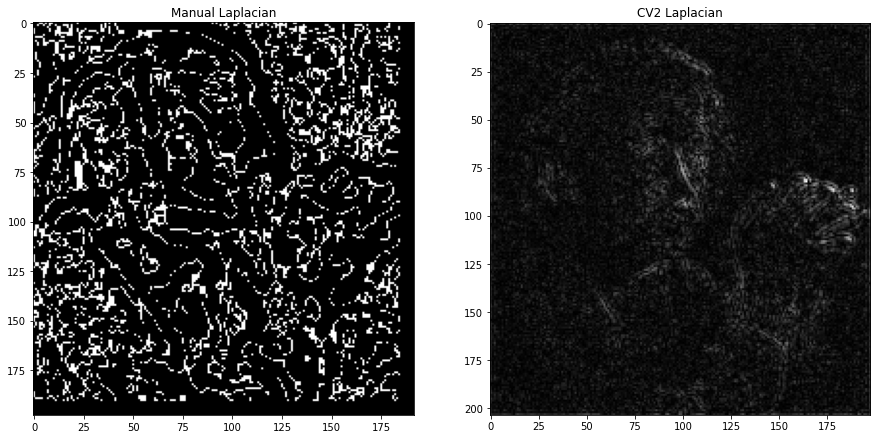

In [42]:
blur_img = cv2.GaussianBlur(image_array, (3, 3), 0)
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)
laplacian_cv = np.sqrt(laplacian**2)

fsize = (15,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(laplacian_manual, cmap='gray'), plt.title('Manual Laplacian')
plt.subplot(122), plt.imshow(laplacian_cv, cmap='gray'), plt.title('CV2 Laplacian')
plt.show()

**Try the convolve function with your own filter** *(1 points)*

Create your own filter (or use one from Google) and convolve it over your imported image

The unsharp filter is a type of image sharpening technique that is commonly used in image processing. The filter works by creating a blurred version of the original image and subtracting it from the original to produce a sharpened version. The name "unsharp" filter comes from the fact that it uses a blurred image to enhance the edges of the original image.
Source- https://towardsdatascience.com/image-filters-in-python-26ee938e57d2

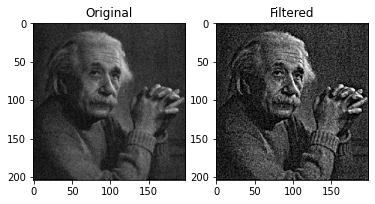

In [48]:
from PIL import Image, ImageFilter

def unsharp_filter(image_path):
    # Load the image
    image = Image.open(image_path)

    # Apply unsharp filter
    filtered_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

    # Plot original and filtered images side by side
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(image)
    axs[0].set_title('Original')
    axs[1].imshow(filtered_image)
    axs[1].set_title('Filtered')
    plt.show()

unsharp_filter("./einstein.jpeg")

Use cases- 

Canny Edge Detector:

When we need to detect edges with high precision and low noise, Canny edge detector can be used. It is considered as one of the most accurate edge detectors available and is widely used in computer vision applications.
When we need to detect edges with multiple thresholds or hysteresis, Canny edge detector is suitable. It allows us to set different thresholds for edge detection, which can be helpful in identifying edges with varying intensity levels.
When we need to detect edges in real-time or in a video stream, Canny edge detector can be used as it is fast and efficient. It can process images in real-time, making it a popular choice for applications such as object detection and tracking.

Laplacian Edge Detector:

When we need to detect edges in a noisy image, Laplacian edge detector can be used. It is less sensitive to noise compared to other edge detection techniques.
When we need to detect edges with high intensity gradients, Laplacian edge detector is suitable. It can detect edges with sharp changes in intensity, making it useful in applications such as medical imaging.
When we need to detect edges with a single threshold value, Laplacian edge detector can be used. Unlike Canny edge detector, Laplacian edge detector only requires a single threshold value for edge detection.

References- 
1. https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e
2. https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123